In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../m_data/train.csv", error_bad_lines=False)

In [3]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [7]:
print(f"Number of Counties: {len(df['county'].unique())}")
print(f"Number of Product Types: {len(df['product_type'].unique())}")

df["datetime"] = pd.to_datetime(df["datetime"])
df["date"] = pd.DatetimeIndex(df["datetime"]).date
print(f"Start Date: {df['date'].min()} & End Date: {df['date'].max()}")

Number of Counties: 16
Number of Product Types: 4
Start Date: 2021-09-01 & End Date: 2023-05-31


In [14]:
for i in df["prediction_unit_id"].unique():
    print(i, end="\r")
    df_ = df[df["prediction_unit_id"]==i]
    df_[df_["is_consumption"]==0].to_csv(f"../m_data/generation/prediction_unit_generation_{i}.csv", index=False)
    df_[df_["is_consumption"]==1].to_csv(f"../m_data/consumption/prediction_consumption_{i}.csv", index=False)

In [8]:
df.groupby(["county", "is_business", "product_type", "is_consumption", "date"]).sum()[["target"]]

target
county is_business product_type is_consumption date                
0      0           1            0              2021-09-01  2797.045
                                               2021-09-02  2496.087
                                               2021-09-03  2299.575
                                               2021-09-04  3120.306
                                               2021-09-05  2584.260
...                                                             ...
15     1           3            1              2023-05-27  2537.281
                                               2023-05-28  2273.081
                                               2023-05-29  7462.889
                                               2023-05-30  7787.871
                                               2023-05-31  6437.183

[84098 rows x 1 columns]

In [9]:
pd.crosstab(df["county"], df["is_business"])

is_business,0,1
county,,
0,91872,121056
1,61248,30624
2,59808,55392
3,61248,61248
4,61248,86016
5,61248,90384
6,0,30624
7,81216,91872
8,61248,30624


In [10]:
pd.crosstab(df["is_business"], df["product_type"])

product_type,0,1,2,3
is_business,,,,
0,0,427296,78816,428736
1,170544,354336,68640,489984


In [11]:
df["prediction_unit_id"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68])

In [12]:
df.groupby(["prediction_unit_id"]).count()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,date
prediction_unit_id,,,,,,,,,
0,30624,30624,30624,30616,30624,30624,30624,30624,30624
1,30624,30624,30624,30616,30624,30624,30624,30624,30624
2,30624,30624,30624,30616,30624,30624,30624,30624,30624
3,30624,30624,30624,30616,30624,30624,30624,30624,30624
4,30624,30624,30624,30616,30624,30624,30624,30624,30624
...,...,...,...,...,...,...,...,...,...
64,26256,26256,26256,26250,26256,26256,26256,26256,26256
65,24768,24768,24768,24762,24768,24768,24768,24768,24768
66,24768,24768,24768,24762,24768,24768,24768,24768,24768


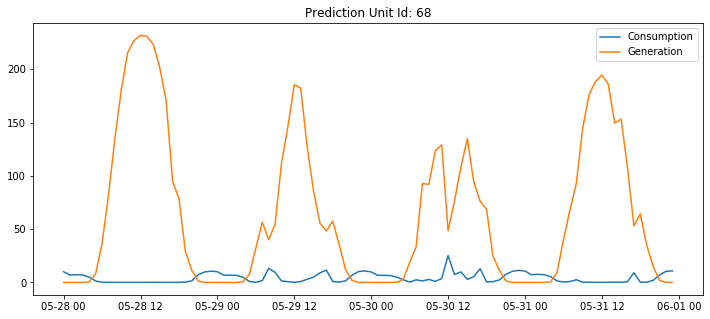

In [23]:
plt.figure(figsize=(12, 5))
a = -96
b = None
plt.title(f'Prediction Unit Id: {df_["prediction_unit_id"].iloc[0]}')
plt.plot(df_[df_["is_consumption"]==1]["datetime"][a:b], df_[df_["is_consumption"]==1]["target"][a:b], label="Consumption")
plt.plot(df_[df_["is_consumption"]==0]["datetime"][a:b], df_[df_["is_consumption"]==0]["target"][a:b], label="Generation")
plt.legend()

In [24]:
df.groupby(["county", "is_business", "product_type", "is_consumption"]).sum()[["target"]]

target
county is_business product_type is_consumption              
0      0           1            0               3.416132e+06
                                1               6.771134e+06
                   2            0               1.281273e+05
                                1               3.537632e+05
                   3            0               1.174890e+07
...                                                      ...
15     1           0            1               4.360266e+06
                   1            0               6.402008e+05
                                1               1.216348e+06
                   3            0               1.450701e+06
                                1               6.246844e+06

[138 rows x 1 columns]

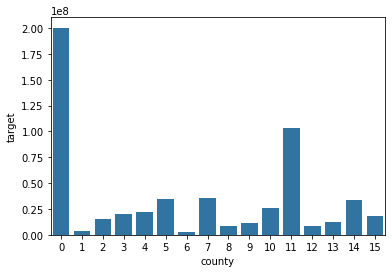

In [30]:
# Is county a differentiting factor

sns.barplot(x="county", y="target", data=df.groupby(["county"]).sum()[["target"]].reset_index(), color="C0")

# Zeroth counrt has maximum consumption + generation. Does it have more number of users or prediction units?

Text(0, 0.5, 'Number of Prediction Units (includes both generatio & consumotion)')

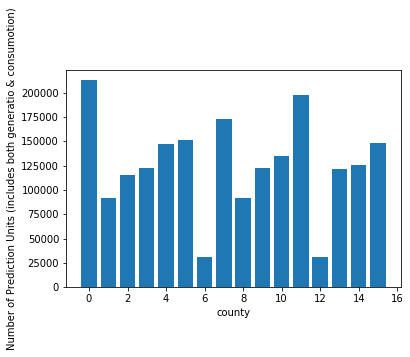

In [37]:
plt.bar(range(len(df["county"].unique())), pd.crosstab(df["prediction_unit_id"], df["county"]).sum())
plt.xlabel("county")
plt.ylabel("Number of Prediction Units (includes both generatio & consumotion)")

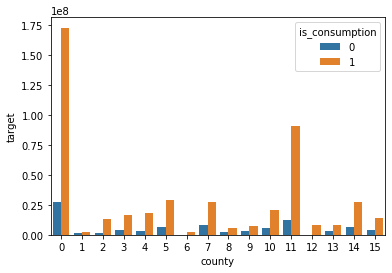

In [29]:
# is generation higher or lower in each county

sns.barplot(x="county", y="target", hue="is_consumption", data=df.groupby(["county", "is_consumption"]).sum()[["target"]].reset_index())

# County 6 & county 7 has no generation
# Majorly consumption is much higher than generation except for county 1

Text(0.5, 1.0, 'Business')

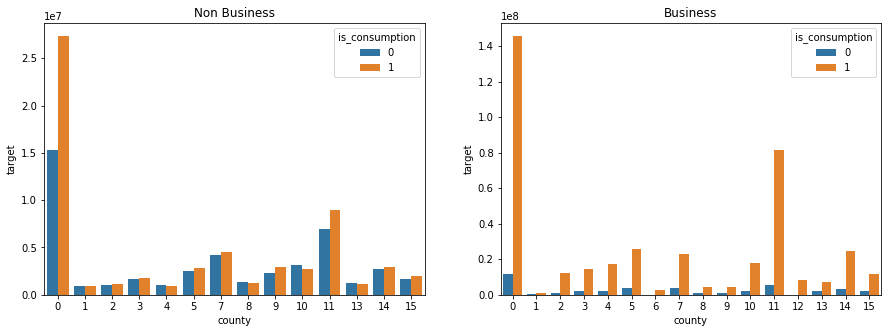

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_plot = df.groupby(["county", "is_consumption", "is_business"]).sum()[["target"]].reset_index()
sns.barplot(x="county", y="target", hue="is_consumption", data=df_plot[df_plot["is_business"]==0], ax=ax[0])
sns.barplot(x="county", y="target", hue="is_consumption", data=df_plot[df_plot["is_business"]==1], ax=ax[1])
ax[0].set_title("Non Business")
ax[1].set_title("Business")

# For non businesses generation and consumption are similar whereas for business it is significantly different
# There are no Non Business premises in county 6 & 12.